# Heart disease prediction using machine learning

# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import *

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# read and preprocess the data

In [2]:
df = pd.read_csv('./dataset/heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Total missing percent of data

In [6]:
missing_data = df.isnull().sum()
total_percentage = (missing_data.sum()/df.shape[0]) * 100
print(f'Total percentage of missing data is {round(total_percentage,2)}%')
duplicate = df[df.duplicated()]
print('duplicated rows:')
duplicate
#drop duplicate rows
df = df.drop_duplicates()

Total percentage of missing data is 0.0%
duplicated rows:


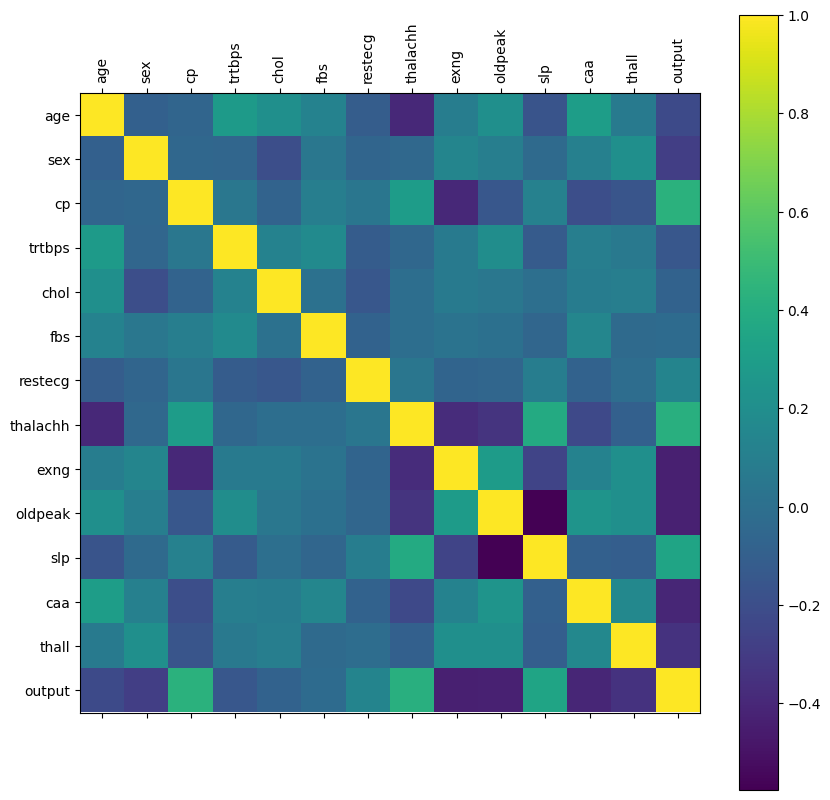

In [7]:
rcParams['figure.figsize'] = 10,10
plt.matshow(df.corr(), fignum=1)
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns, rotation=90)
plt.colorbar()
plt.show()

In [8]:
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


# count of each output class

Text(0.5, 1.0, 'count of each output class')

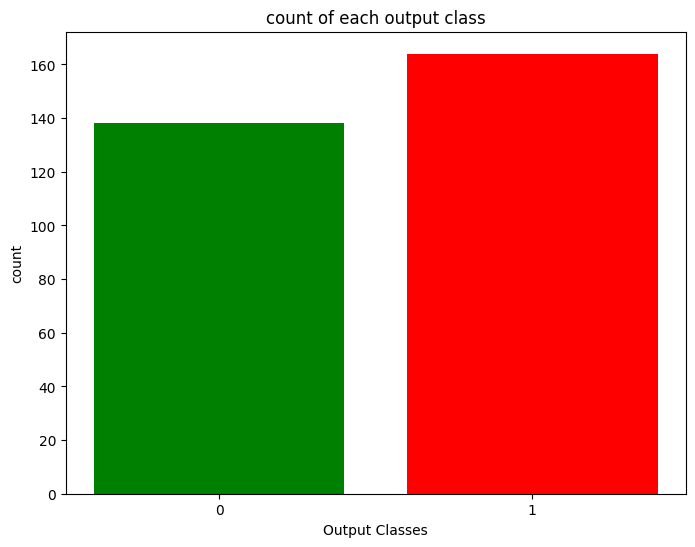

In [9]:
rcParams['figure.figsize'] = 8,6
plt.bar(df['output'].unique(),df['output'].value_counts(),color = ['red', 'green'])
plt.xticks([0,1])
plt.xlabel('Output Classes')
plt.ylabel('count')
plt.title('count of each output class')

# divide data into training testing classes

In [10]:
X = df.drop(['output'], axis = 1)
y = df['output']
X_train, X_test, y_train , y_test = train_test_split(X, y,test_size=0.3,random_state =0)
print("X_train-",X_train.shape[0],"X_test-",X_test.shape[0],"y_train-",y_train.shape[0],"y_test-",y_test.shape[0])

X_train- 211 X_test- 91 y_train- 211 y_test- 91


# model building

# KNN algorithm

In [11]:
knn_scores = []
for k in range(2,21):
    knn_classifiers = KNeighborsClassifier(n_neighbors = k)
    knn_classifiers.fit(X_train.values, y_train.values)
    knn_score = round(knn_classifiers.score(X_test.values, y_test.values),2)
    knn_scores.append(knn_scores)
    
    
knn_classifiers = KNeighborsClassifier(n_neighbors = 11)
knn_classifiers.fit(X_train, y_train)
knn_scores=knn_classifiers.predict(X_test)
print(classification_report(y_test,knn_scores))

              precision    recall  f1-score   support

           0       0.66      0.51      0.57        45
           1       0.61      0.74      0.67        46

    accuracy                           0.63        91
   macro avg       0.63      0.63      0.62        91
weighted avg       0.63      0.63      0.62        91



# support Vector machine (svm)

In [12]:
from sklearn.metrics import accuracy_score

svc_scores = []
kernels = ['linear','poly','rbf','sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train,y_train.values)
    svc_scores.append(round(svc_classifier.score(X_test.values,y_test.values),2))
    
svc_classifier = SVC(probability=True,kernel = kernels[0])
svc_classifier.fit(X_train.values,y_train.values)
svc_prediction_result=svc_classifier.predict(X_test.values)
print(accuracy_score(y_test.values,svc_prediction_result))

0.8241758241758241


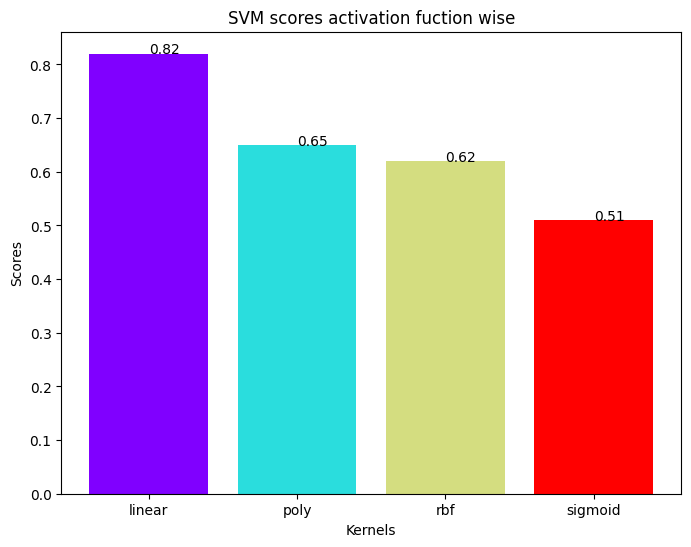

In [13]:
colors = rainbow(np.linspace(0,1,len(kernels)))
plt.bar(kernels,svc_scores,color=colors)
for i in range(len(kernels)):
    plt.text(i,svc_scores[i],svc_scores[i])
    plt.xlabel('Kernels')
    plt.ylabel('Scores')
    plt.title('SVM scores activation fuction wise')

# Decision tree

In [14]:
dt_scores = []
for i in range (1, len(X.columns)+1):
    dt_classifier = DecisionTreeClassifier(max_features =i,random_state=0)
    dt_classifier.fit(X_train,y_train.values)
    dt_scores.append(round(dt_classifier.score(X_test.values,y_test.values),2))
print('Done')

Done


In [15]:
print(dt_scores)

[0.67, 0.7, 0.79, 0.78, 0.79, 0.76, 0.76, 0.84, 0.73, 0.77, 0.76, 0.73, 0.74]


In [16]:
dt_classifier = DecisionTreeClassifier(max_features = 13,random_state=0)
dt_classifier.fit(X_train.values,y_train.values)

DecisionTreeClassifier(max_features=13, random_state=0)

Text(0.5, 1.0, 'decision tree classifier')

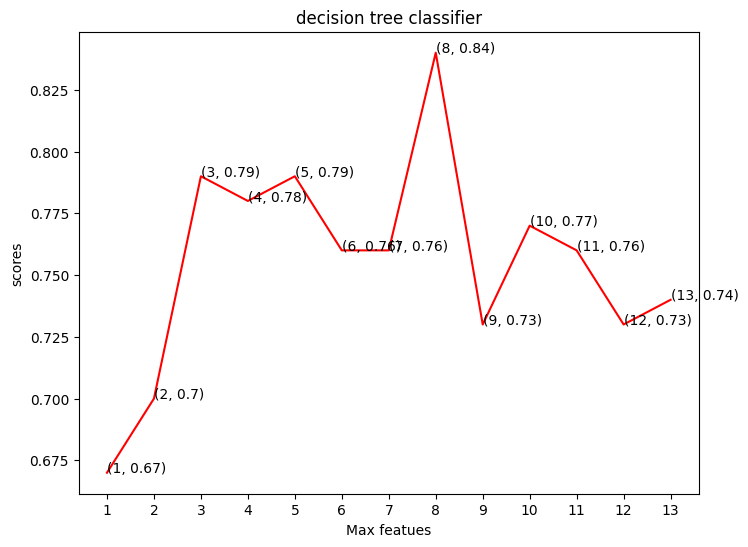

In [17]:
plt.plot([i for i in range(1,len(X.columns)+1)],dt_scores,color='red')
for i in range(1,len(X.columns)+1):
    plt.text(i,dt_scores[i-1],(i,dt_scores[i-1]))
plt.xticks([i for i in range(1,len(X.columns)+1)])
plt.xlabel('Max featues')
plt.ylabel('scores')
plt.title('decision tree classifier')

# Random forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_scores = []
estimators = [10,20,100,200,500]
for i in estimators:
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)
    score = rf_classifier.score(X_test, y_test)
    rf_scores.append(round(score, 2)) 

Text(0.5, 1.0, 'random forest classifier')

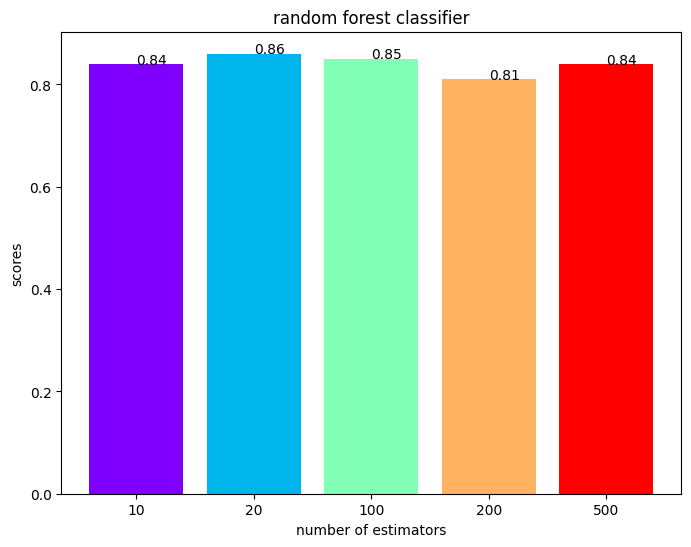

In [19]:
colors = rainbow(np.linspace(0,1,len(estimators)))
plt.bar([i for i in range(len(estimators))],rf_scores,color=colors,width=0.8)
for i in range(len(estimators)):
    plt.text(i,rf_scores[i],rf_scores[i])
plt.xticks(ticks=[i for i in range(len(estimators))],labels=[str(estimator) for estimator in estimators])
plt.xlabel('number of estimators')
plt.ylabel('scores')
plt.title('random forest classifier')

In [20]:
print(rf_scores)

[0.84, 0.86, 0.85, 0.81, 0.84]


# logistic regression

In [21]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train.values,y_train.values)
logistic_model_prediction=logistic_model.predict(X_test.values)
print(accuracy_score(y_test.values,logistic_model_prediction))
print(classification_report(y_test.values,logistic_model_prediction))

0.8131868131868132
              precision    recall  f1-score   support

           0       0.87      0.73      0.80        45
           1       0.77      0.89      0.83        46

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



# save trained models

In [22]:
import pickle
all_models = [rf_classifier,logistic_model,dt_classifier,svc_classifier,knn_classifiers]
with open("models.pkl",'wb') as files:
    pickle.dump(all_models,files)
print("done")

done


In [23]:
open_file = open("models.pkl","rb")
loaded_list=pickle.load(open_file)
print(loaded_list)
open_file.close()
print("done")

[RandomForestClassifier(), LogisticRegression(), DecisionTreeClassifier(max_features=13, random_state=0), SVC(kernel='linear', probability=True), KNeighborsClassifier(n_neighbors=11)]
done
